In [3]:
''' LangGraph '''

from dotenv import load_dotenv
import os

load_dotenv()

groq_api_key = os.getenv("GROQ_API_KEY")
langsmith_api_key = os.getenv("LANGSMITH_API_KEY")

In [4]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith_api_key
os.environ["LANGCHAIN_TRACKING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "TEST_LANGGRAPH"

In [36]:
from langchain_ollama import ChatOllama

llm = ChatOllama(model="llama3.1:8b",temperature=0.3)

### Building chatbot using LangGraph

In [37]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [38]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

graph_builder = StateGraph(State)

In [39]:
def chatbot(state:State):
    return {"messages":llm.invoke(state['messages'])}

In [40]:
graph_builder.add_node("chatbot", chatbot)

In [41]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [42]:
graph = graph_builder.compile()

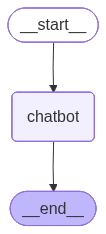

In [43]:
graph

In [45]:
while True:
    user_input = input("User input: ")

    if user_input.lower() in ["quit", "q"]:
        print("Good Bye...")
        break

    for event in graph.stream({'messages':('user',user_input)}):
        print(event.values())

        for value in event.values():
            print(value['messages'])
            print("Assitance Message: ", value['messages'].content)
    

dict_values([{'messages': AIMessage(content='Hello! How are you today? Is there something I can help you with or would you like to chat?', additional_kwargs={}, response_metadata={'model': 'llama3.1:8b', 'created_at': '2026-01-02T13:29:25.5335965Z', 'done': True, 'done_reason': 'stop', 'total_duration': 1980726000, 'load_duration': 93589400, 'prompt_eval_count': 11, 'prompt_eval_duration': 320186800, 'eval_count': 23, 'eval_duration': 1517588900, 'logprobs': None, 'model_name': 'llama3.1:8b', 'model_provider': 'ollama'}, id='lc_run--019b7ee6-0960-7070-be28-4e8463468618-0', usage_metadata={'input_tokens': 11, 'output_tokens': 23, 'total_tokens': 34})}])
content='Hello! How are you today? Is there something I can help you with or would you like to chat?' additional_kwargs={} response_metadata={'model': 'llama3.1:8b', 'created_at': '2026-01-02T13:29:25.5335965Z', 'done': True, 'done_reason': 'stop', 'total_duration': 1980726000, 'load_duration': 93589400, 'prompt_eval_count': 11, 'prompt_